# EM clustering algorithm / EM vs k-Means Algorithm

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix

Text(0.5, 1.0, 'Petal')

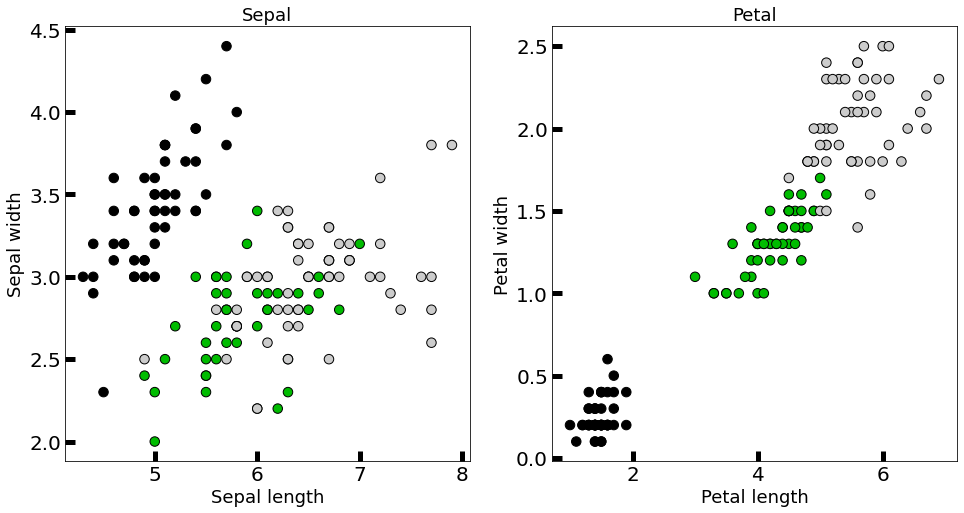

In [18]:
iris = datasets.load_iris()
sepal_X = iris.data[:, :2]
petal_X = iris.data[:, 2:]
y = iris.target
categories = len(iris.target_names)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(sepal_X[:, 0], sepal_X[:, 1], c=y, cmap='nipy_spectral', edgecolor='k', s=90)
axes[1].scatter(petal_X[:, 0], petal_X[:, 1], c=y, cmap='nipy_spectral', edgecolor='k', s=90)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, labelsize=20)
axes[0].set_title('Sepal', fontsize=18)
axes[1].set_title('Petal', fontsize=18)

## Model

In [20]:
model_sepal = KMeans(n_clusters=3)
model_sepal.fit(sepal_X)
model_petal = KMeans(n_clusters=3)
model_petal.fit(petal_X)

KMeans(n_clusters=3)

## Analysis

In [23]:
def plot_centers(sepal_centers, petal_centers):
    plt.scatter([point[0] for point in sepal_centers], [point[1] for point in sepal_centers])
    plt.title('Sepal KMeans Centers')
    plt.show()

    plt.scatter([point[0] for point in petal_centers], [point[1] for point in petal_centers])
    plt.title('Petal KMeans Centers')
    plt.show()
    
def plot_actualvpredicted(X, y, predicted, part):
    fig, axes = plt.subplots(1, 2, figsize=(16,8))
    axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='nipy_spectral', edgecolor='k', s=90)
    axes[1].scatter(X[:, 0], X[:, 1], c=predicted, cmap='jet', edgecolor='k', s=90)
    axes[0].set_xlabel(f'{part} length', fontsize=18)
    axes[0].set_ylabel(f'{part} width', fontsize=18)
    axes[1].set_xlabel(f'{part} length', fontsize=18)
    axes[1].set_ylabel(f'{part} width', fontsize=18)
    axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
    axes[0].set_title('Actual', fontsize=18)
    axes[1].set_title('Predicted', fontsize=18)
    plt.show()
    
def plot_confusion(accuracy, confusion, part):
    print(f'{part} Accuracy: {accuracy}')

    fig, ax = plt.subplots()
    im = ax.imshow(confusion)

    ax.set_xticks(range(categories))
    ax.set_yticks(range(categories))
    ax.set_xticklabels(iris.target_names)
    ax.set_yticklabels(iris.target_names)

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    for i in range(categories):
        for j in range(categories):
            text = ax.text(j, i, confusion[i, j],
                           ha="center", va="center", color="w")

    ax.set_title(f"{part} Confusion Matrix (Actual / Predicted)")
    fig.tight_layout()
    plt.show()

## Graph

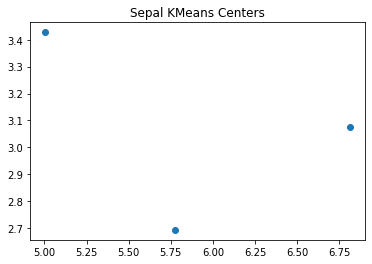

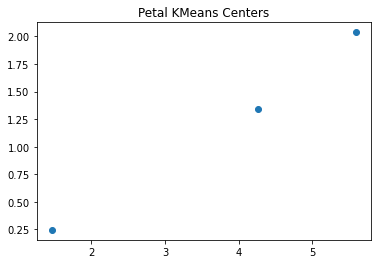

In [22]:
sepal_centers = model_sepal.cluster_centers_
petal_centers = model_petal.cluster_centers_
plot_centers(sepal_centers, petal_centers)

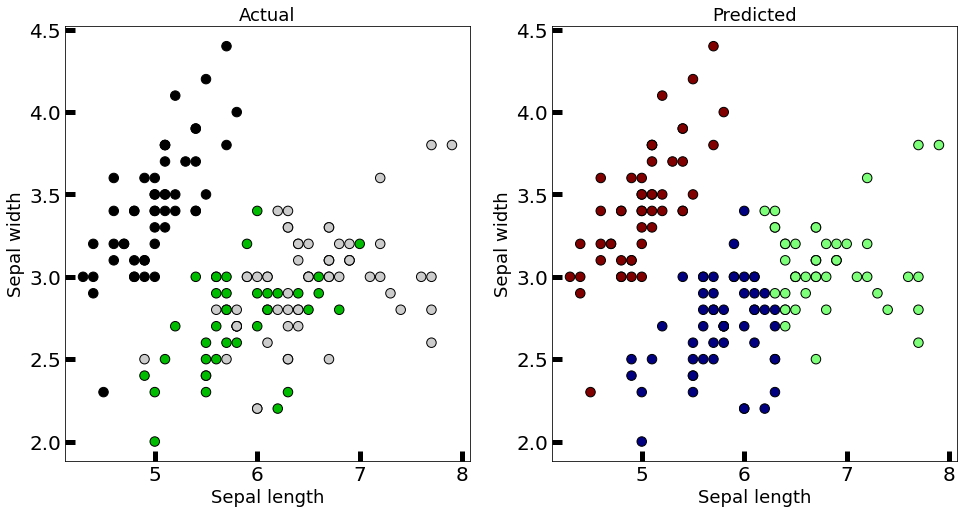

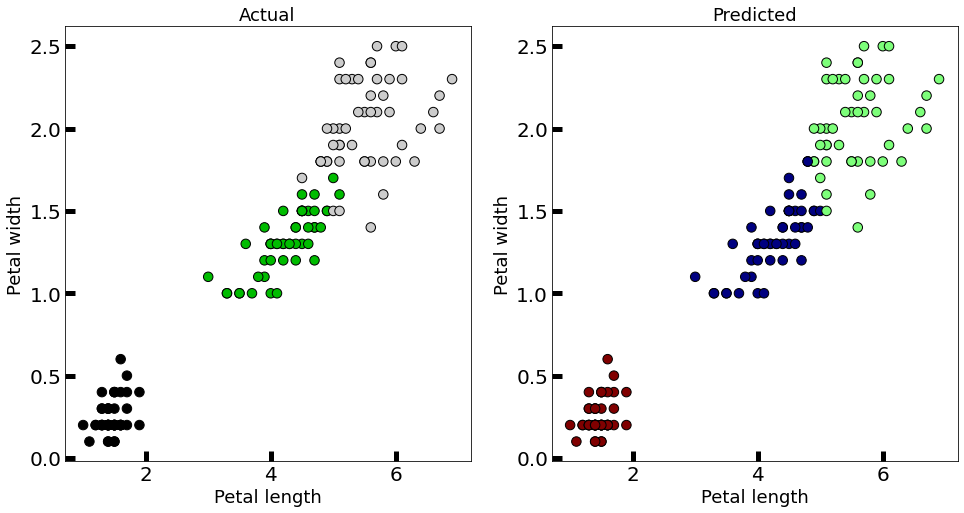

In [24]:
sepal_labels = model_sepal.labels_
petal_labels = model_petal.labels_
plot_actualvpredicted(sepal_X, y, sepal_labels, 'Sepal')
plot_actualvpredicted(petal_X, y, petal_labels, 'Petal')

Sepal Accuracy: 0.08


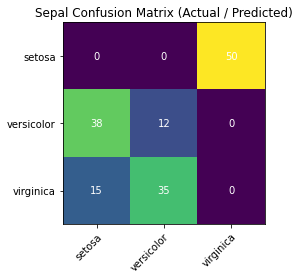

Petal Accuracy: 0.013333333333333334


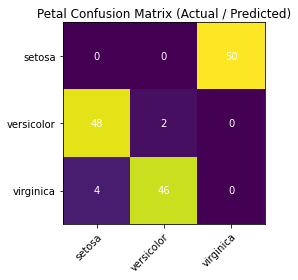

In [25]:

sepal_accuracy = accuracy_score(y, sepal_labels)
petal_accuracy = accuracy_score(y, petal_labels)

sepal_confusion = confusion_matrix(y, sepal_labels)
petal_confusion = confusion_matrix(y, petal_labels)
plot_confusion(sepal_accuracy, sepal_confusion, 'Sepal')
plot_confusion(petal_accuracy, petal_confusion, 'Petal')

# Analysis with Different Number of Clusters



================================== 1 clusters ==================================




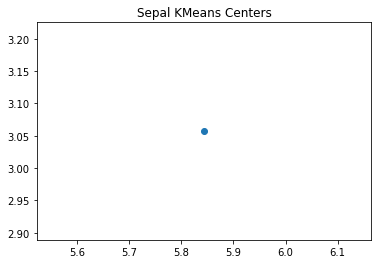

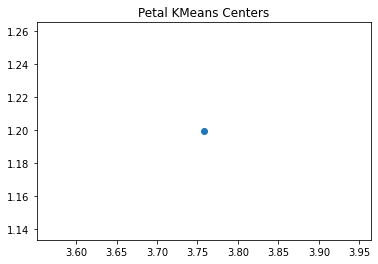

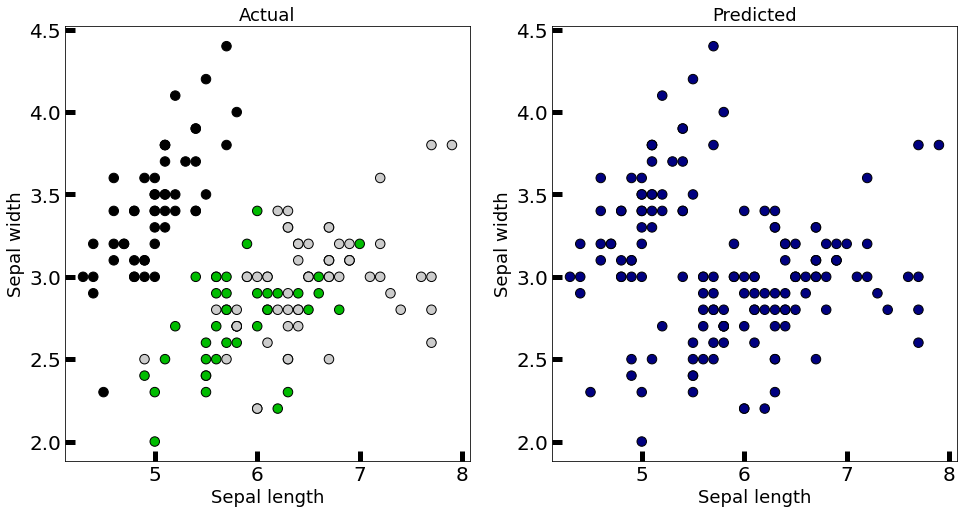

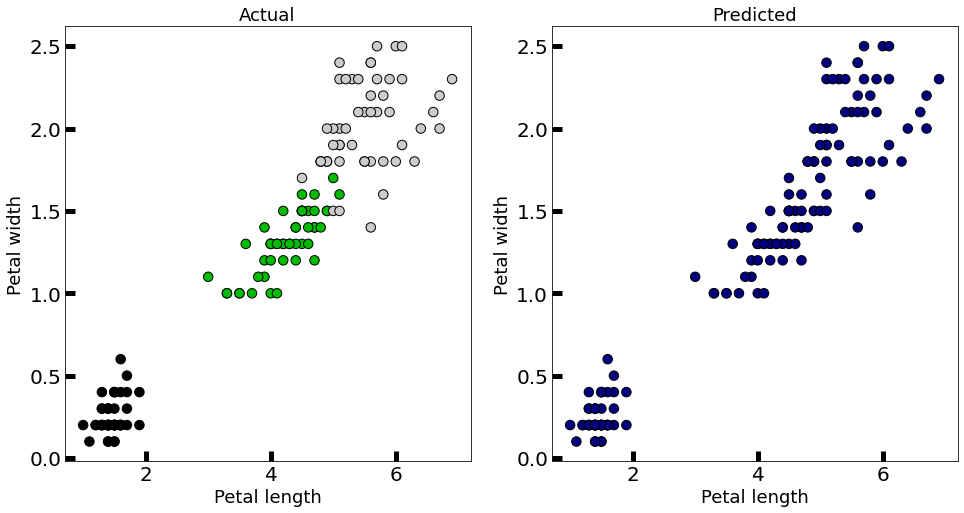

Sepal Accuracy: 0.3333333333333333


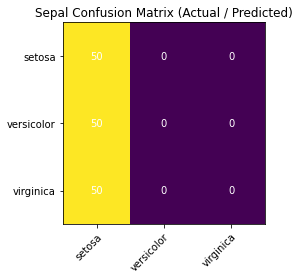

Petal Accuracy: 0.3333333333333333


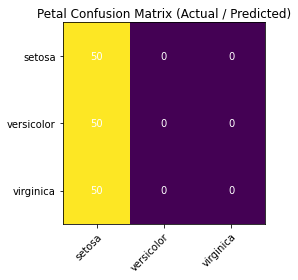



================================== 2 clusters ==================================




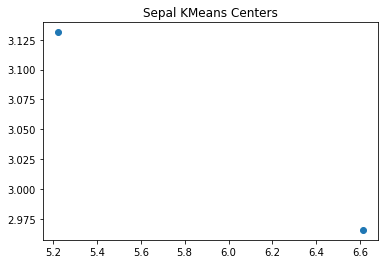

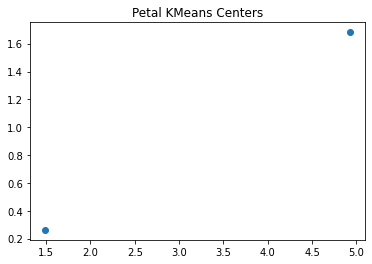

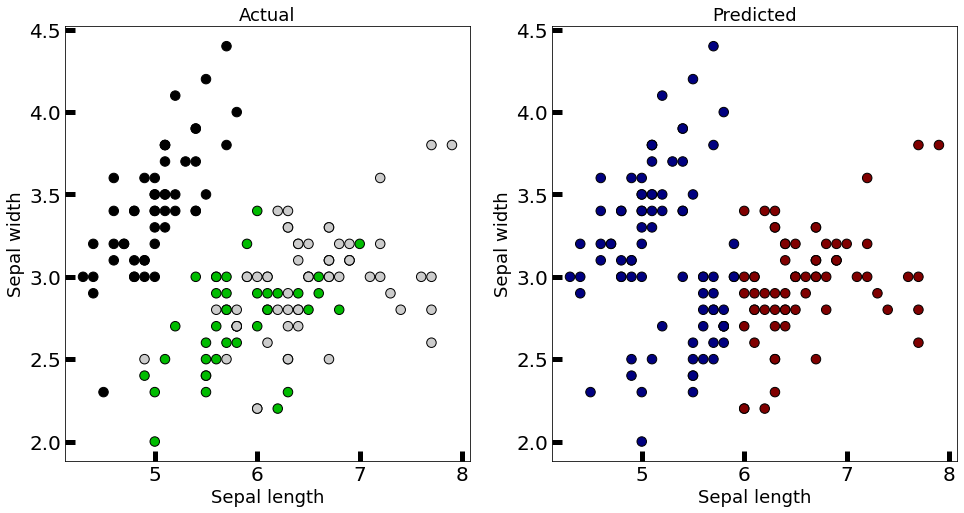

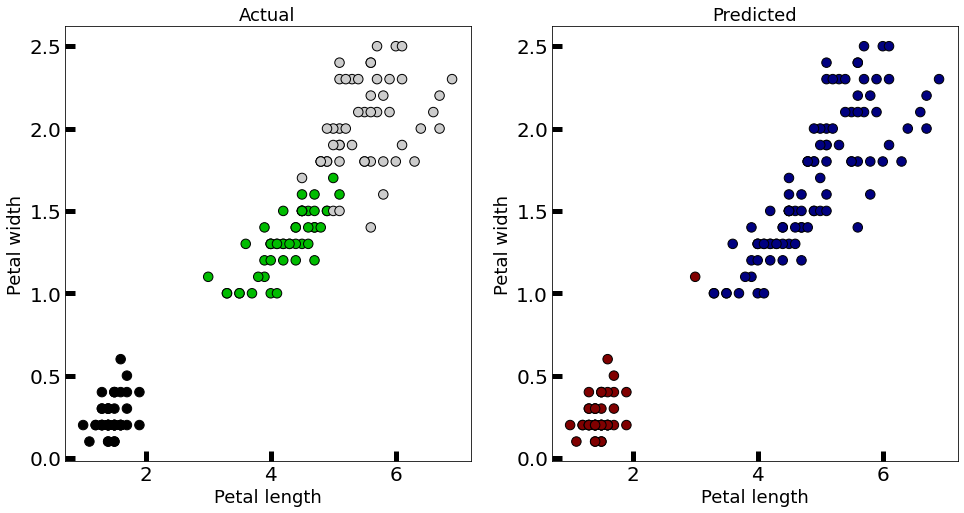

Sepal Accuracy: 0.49333333333333335


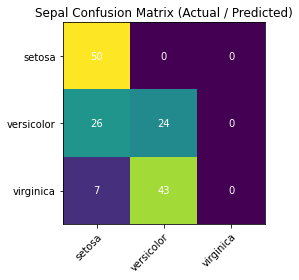

Petal Accuracy: 0.006666666666666667


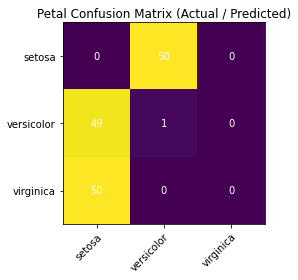



================================== 3 clusters ==================================




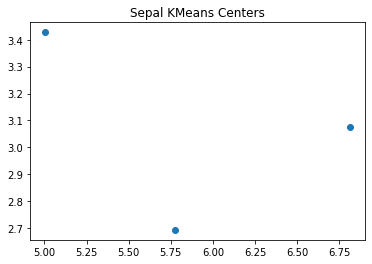

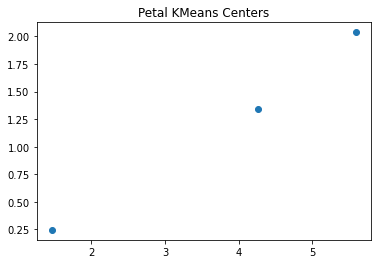

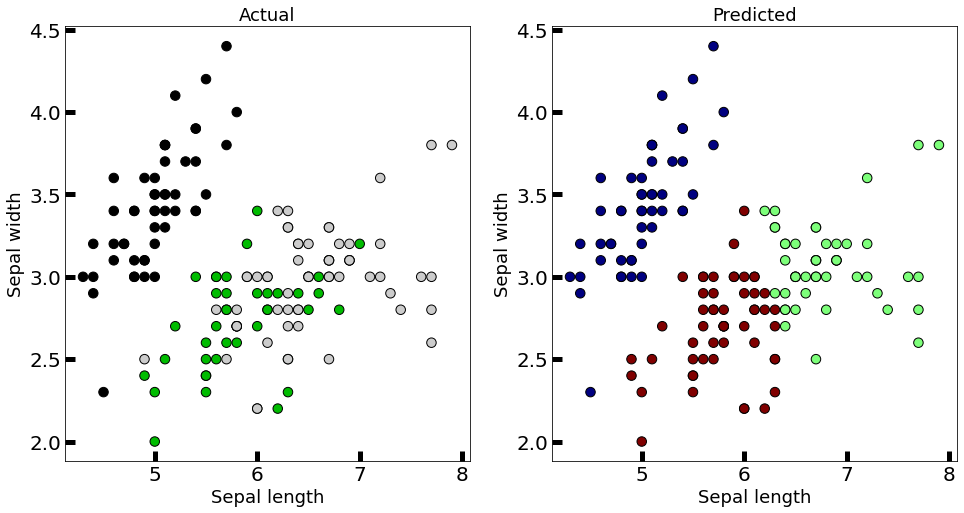

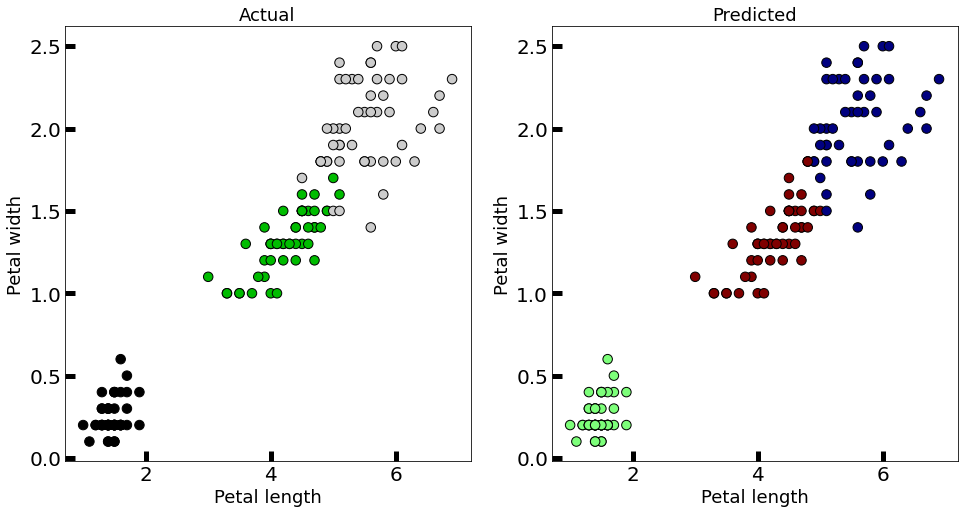

Sepal Accuracy: 0.5133333333333333


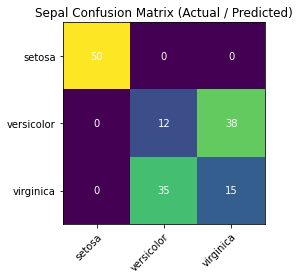

Petal Accuracy: 0.02666666666666667


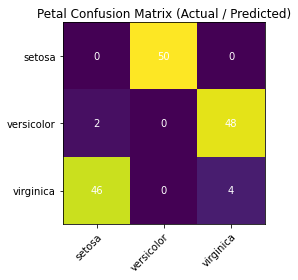

In [27]:
for n_clusters in range(1, 4):
    print(f'\n\n================================== {n_clusters} clusters ==================================\n\n')
    
    model_sepal = KMeans(n_clusters=n_clusters)
    model_sepal.fit(sepal_X)
    model_petal = KMeans(n_clusters=n_clusters)
    model_petal.fit(petal_X)
    
    sepal_centers = model_sepal.cluster_centers_
    petal_centers = model_petal.cluster_centers_
    
    plot_centers(sepal_centers, petal_centers)
    
    sepal_labels = model_sepal.labels_
    petal_labels = model_petal.labels_
    
    plot_actualvpredicted(sepal_X, y, sepal_labels, 'Sepal')
    plot_actualvpredicted(petal_X, y, petal_labels, 'Petal')
    
    sepal_accuracy = accuracy_score(y, sepal_labels)
    petal_accuracy = accuracy_score(y, petal_labels)
    sepal_confusion = confusion_matrix(y, sepal_labels)
    petal_confusion = confusion_matrix(y, petal_labels)
    
    plot_confusion(sepal_accuracy, sepal_confusion, 'Sepal')
    plot_confusion(petal_accuracy, petal_confusion, 'Petal')